In [2]:
# Data loading and cleaning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\Oasis\Level 1 - Project 3\archive (2)\CAvideos.csv")
pd.set_option("display.max_columns", None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [7]:
df.nunique()

video_id                  24427
trending_date               205
title                     24573
channel_title              5076
category_id                  17
publish_time              23613
tags                      20157
views                     40170
likes                     24676
dislikes                   6241
comment_count             11172
thumbnail_link            24422
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               22345
dtype: int64

In [8]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [9]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [10]:
df['description'].fillna('No description', inplace=True)

In [11]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40881.0,2.079555e+01,6.775054e+00,1.0,20.0,24.0,24.0,43.0
views,40881.0,1.147036e+06,3.390913e+06,733.0,143902.0,371204.0,963302.0,137843120.0
likes,40881.0,3.958269e+04,1.326895e+05,0.0,2191.0,8780.0,28717.0,5053338.0
dislikes,40881.0,2.009195e+03,1.900837e+04,0.0,99.0,303.0,950.0,1602383.0
comment_count,40881.0,5.042975e+03,2.157902e+04,0.0,417.0,1301.0,3713.0,1114800.0


In [12]:
# Group by channel and calculate total views and likes
channel_stats = df.groupby('channel_title').agg({
    'views': 'sum',
    'likes': 'sum'
}).reset_index()

# Channel with the most views
most_views_channel = channel_stats.loc[channel_stats['views'].idxmax()]
most_views_channel_id = most_views_channel['channel_title']
most_views_category_id = df.loc[df['channel_title'] == most_views_channel_id, 'category_id'].iloc[0]

# Channel with the most likes
most_likes_channel = channel_stats.loc[channel_stats['likes'].idxmax()]
most_likes_channel_id = most_likes_channel['channel_title']
most_likes_category_id = df.loc[df['channel_title'] == most_likes_channel_id, 'category_id'].iloc[0]

# Channel with the least views
least_views_channel = channel_stats.loc[channel_stats['views'].idxmin()]
least_views_channel_id = least_views_channel['channel_title']
least_views_category_id = df.loc[df['channel_title'] == least_views_channel_id, 'category_id'].iloc[0]

# Channel with the least likes
least_likes_channel = channel_stats.loc[channel_stats['likes'].idxmin()]
least_likes_channel_id = least_likes_channel['channel_title']
least_likes_category_id = df.loc[df['channel_title'] == least_likes_channel_id, 'category_id'].iloc[0]

print(f"Channel with the most views: {most_views_channel_id} (Category ID: {most_views_category_id})")
print(f"Channel with the most likes: {most_likes_channel_id} (Category ID: {most_likes_category_id})")
print(f"Channel with the least views: {least_views_channel_id} (Category ID: {least_views_category_id})")
print(f"Channel with the least likes: {least_likes_channel_id} (Category ID: {least_likes_category_id})")

Channel with the most views: Marvel Entertainment (Category ID: 24)
Channel with the most likes: ibighit (Category ID: 10)
Channel with the least views: udearroba (Category ID: 27)
Channel with the least likes: 5 News (Category ID: 25)


In [13]:
# Count of unique values in 'category_id'
print(df['category_id'].value_counts())

category_id
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: count, dtype: int64


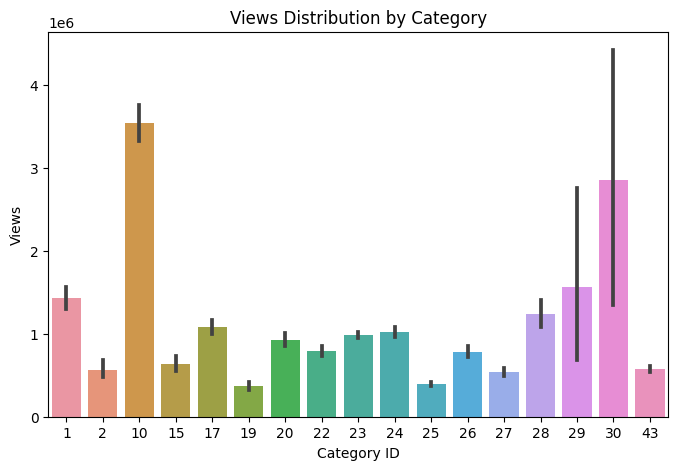

In [14]:
# Boxplot for Views
plt.figure(figsize=(8, 5))
sns.barplot(x='category_id', y='views', data=df,)
plt.title('Views Distribution by Category')
plt.xlabel('Category ID')
plt.ylabel('Views')
plt.show()

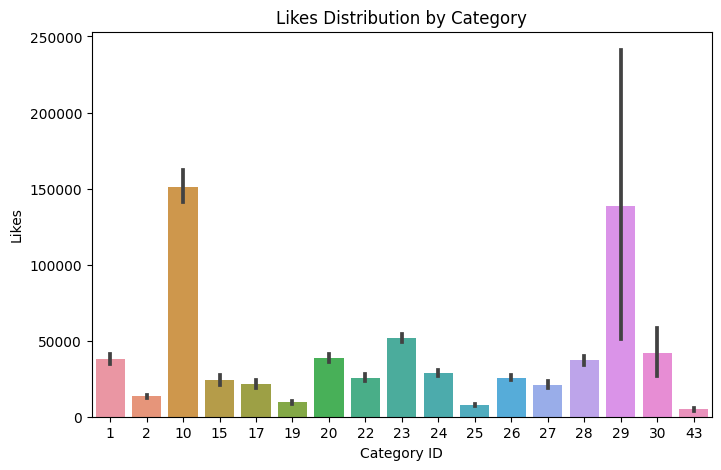

In [15]:
# Boxplot for likes
plt.figure(figsize=(8, 5))
sns.barplot(x='category_id', y='likes', data=df)
plt.title('Likes Distribution by Category')
plt.xlabel('Category ID')
plt.ylabel('Likes')
plt.show()

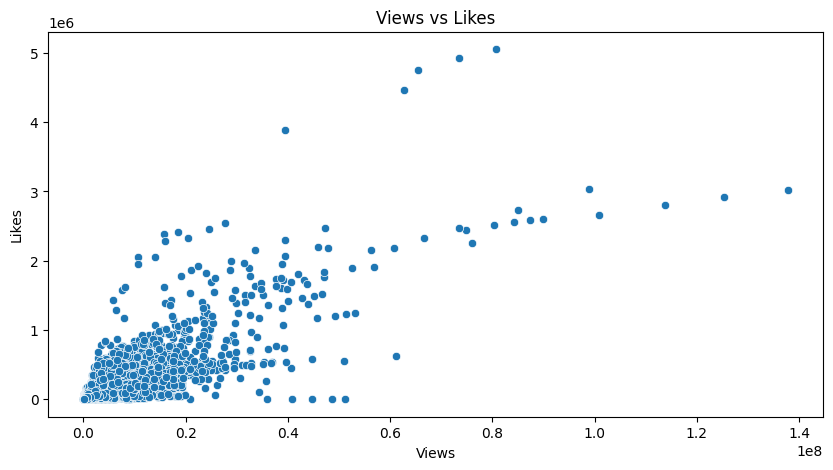

In [16]:
# Scatter plot of views vs likes
plt.figure(figsize=(10, 5))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

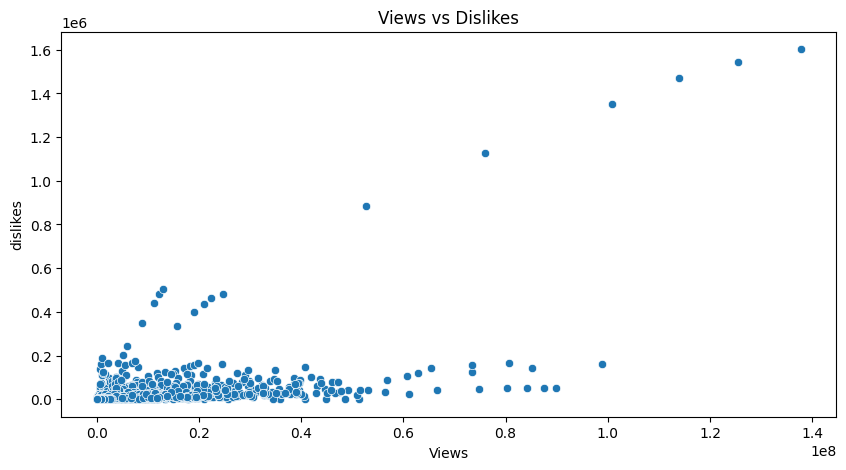

In [17]:
# Scatter plot of views vs dislikes
plt.figure(figsize=(10, 5))
sns.scatterplot(x='views', y='dislikes', data=df)
plt.title('Views vs Dislikes')
plt.xlabel('Views')
plt.ylabel('dislikes')
plt.show()